In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


### Removing outlier using percentile of lower and upper limit of (0.001, 0.999)

In [3]:
min_thresold, max_thresold = df.price_per_sqft.quantile([0.001, 0.999])
min_thresold, max_thresold

(1366.184, 50959.36200000099)

In [4]:
df0 = df[(df.price_per_sqft>min_thresold) & (df.price_per_sqft<max_thresold)]
df0.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
11429,Kanakpura Road,3 BHK,1452.0,3.0,60.98,3,4199
4336,Whitefield,2 BHK,1405.0,2.0,84.50,2,6014
12641,other,3 BHK,2250.0,3.0,180.00,3,8000
11426,other,3 BHK,3200.0,4.0,140.00,3,4375
2358,Whitefield,3 BHK,2010.0,3.0,92.00,3,4577
3008,Vijayanagar,3 BHK,1527.0,3.0,115.00,3,7531
3000,Babusapalaya,3 BHK,1675.0,3.0,75.00,3,4477
8270,Haralur Road,3 BHK,1510.0,3.0,83.05,3,5500
960,Uttarahalli,2 BHK,1175.0,2.0,47.00,2,4000
10791,Balagere,2 BHK,1012.0,2.0,70.00,2,6916


### Removing outlier from the generated DataFrame using std_dev of 4

In [6]:
df0.price_per_sqft.mean()

6663.6537351958705

In [7]:
df0.price_per_sqft.std()

4141.020700174605

In [8]:
upper_limit = df0.price_per_sqft.mean() + 4*df0.price_per_sqft.std()
upper_limit

23227.73653589429

In [9]:
lower_limit = df0.price_per_sqft.mean() - 4*df0.price_per_sqft.std()
lower_limit

-9900.429065502549

In [13]:
df_no_outlier_std_dev = df0[(df0.price_per_sqft < upper_limit) & (df0.price_per_sqft > lower_limit)]
df_no_outlier_std_dev.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10181,CV Raman Nagar,2 BHK,1040.0,2.0,50.00,2,4807
10901,other,2 BHK,1050.0,2.0,45.00,2,4285
5609,Kaggadasapura,3 BHK,1340.0,3.0,66.00,3,4925
6892,Electronic City,3 BHK,1500.0,2.0,77.50,3,5166
9752,Hoodi,1 BHK,863.0,1.0,40.55,1,4698
1502,other,3 BHK,1560.0,2.0,66.00,3,4230
9156,other,2 BHK,565.0,2.0,15.00,2,2654
2229,Nagasandra,3 BHK,1470.0,2.0,110.00,3,7482
2792,Bhoganhalli,3 BHK,1700.0,3.0,126.00,3,7411
524,Rajiv Nagar,3 BHK,1867.0,3.0,160.00,3,8569


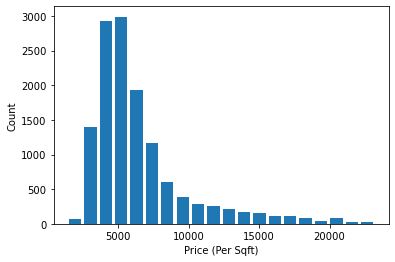

In [14]:
plt.hist(df_no_outlier_std_dev.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price (Per Sqft)')
plt.ylabel('Count')
plt.show()

In [15]:
df0.shape[0] - df_no_outlier_std_dev.shape[0]

125

### Removing outlier from the generated DataFrame using Z_score of 4

In [18]:
df0['zscore'] = (df0.price_per_sqft - df0.price_per_sqft.mean())/df0.price_per_sqft.std()
df0.head()

<ipython-input-18-ea826a2a9728>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['zscore'] = (df0.price_per_sqft - df0.price_per_sqft.mean())/df0.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [19]:
df0[df0.zscore>4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [20]:
df0[df0.zscore<-4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore


In [22]:
df_no_outlier_zscore = df0[(df0.zscore<4) & (df0.zscore>-4)]
df_no_outlier_zscore.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
2943,other,3 BHK,1355.0,3.0,61.0,3,4501,-0.522251
9199,Kodigehaali,4 Bedroom,1200.0,4.0,130.0,4,10833,1.006840
12345,other,2 BHK,925.0,2.0,68.0,2,7351,0.165985
5338,KR Puram,2 BHK,1001.0,2.0,30.0,2,2997,-0.885447
4874,Balagere,2 BHK,1205.0,2.0,70.0,2,5809,-0.206387
10104,Electronic City,3 BHK,1360.0,2.0,58.0,3,4264,-0.579484
4589,Whitefield,4 BHK,2928.0,4.0,198.0,4,6762,0.023749
8908,Whitefield,3 BHK,1346.0,2.0,100.0,3,7429,0.184821
4568,Varthur,4 Bedroom,1600.0,4.0,112.0,4,7000,0.081223
12898,Yeshwanthpur,3 BHK,1855.0,3.0,135.0,3,7277,0.148115


In [23]:
df0.shape[0] - df_no_outlier_zscore.shape[0]

125